In [31]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for better visuals
sns.set(style="whitegrid")

# Load the cleaned data
data = pd.read_csv('../data/football_data_cleaned.csv')

# Display the first few rows of the dataset
data.head()


,Div,Date,Time,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,AwayTeam_Man City,AwayTeam_Man United,AwayTeam_Newcastle,AwayTeam_Nott'm Forest,AwayTeam_Sheffield United,AwayTeam_Southampton,AwayTeam_Tottenham,AwayTeam_West Ham,AwayTeam_Wolves,Result
0,E0,2022-08-05,20:00,0,2,A,0,1,A,A Taylor,...,False,False,False,False,False,False,False,False,False,0
1,E0,2022-08-06,12:30,2,2,D,1,0,H,A Madley,...,False,False,False,False,False,False,False,False,False,1
2,E0,2022-08-06,15:00,2,0,H,1,0,H,P Bankes,...,False,False,False,False,False,False,False,False,False,2
3,E0,2022-08-06,15:00,2,1,H,1,1,D,R Jones,...,False,False,False,False,False,False,False,False,True,2
4,E0,2022-08-06,15:00,2,0,H,0,0,D,S Hooper,...,False,False,False,True,False,False,False,False,False,2


In [32]:
# Check the distribution of the target variable
# Want to ensure one result doesn't dominate
print(data['Result'].value_counts())


Result
2    370
0    244
1    176
Name: count, dtype: int64


In [33]:
# Check for missing values
print(data.isnull().sum())

# Get basic information about data types and non-null counts
data.info()

# Get summary statistics for numerical columns
data.describe()


Div                     0
Date                    0
Time                    0
FTHG                    0
FTAG                    0
                       ..
AwayTeam_Southampton    0
AwayTeam_Tottenham      0
AwayTeam_West Ham       0
AwayTeam_Wolves         0
Result                  0
Length: 180, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790 entries, 0 to 789
Columns: 180 entries, Div to Result
dtypes: bool(48), float64(108), int64(18), object(6)
memory usage: 851.8+ KB


,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,...,1XBCA,BFECH,BFECD,BFECA,BFEC>2.5,BFEC<2.5,BFECAHH,BFECAHA,GoalDifference,Result
count,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,790.000000,790.000000
mean,1.701266,1.353165,0.746835,0.591139,14.583544,11.808861,5.141772,4.173418,10.707595,11.167089,...,4.897667,2.937667,4.786667,5.472667,1.682333,2.590667,1.984000,2.004000,0.348101,1.159494
std,1.385924,1.237596,0.870126,0.782361,5.942477,5.227903,2.693964,2.380541,3.393398,3.617999,...,5.316853,1.795334,2.007655,6.551689,0.210511,0.541536,0.086646,0.089157,1.980665,0.867600
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,...,1.340000,1.120000,3.350000,1.370000,1.330000,1.890000,1.840000,1.850000,-8.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,8.000000,3.000000,2.000000,8.000000,9.000000,...,2.022500,1.755000,3.750000,2.160000,1.520000,2.130000,1.907500,1.932500,-1.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,14.000000,11.000000,5.000000,4.000000,10.000000,11.000000,...,2.700000,2.510000,4.000000,2.960000,1.630000,2.560000,1.985000,1.995000,0.000000,1.000000
75%,2.000000,2.000000,1.000000,1.000000,18.000000,15.000000,7.000000,5.000000,13.000000,14.000000,...,4.957500,3.562500,5.150000,5.200000,1.865000,2.915000,2.037500,2.077500,2.000000,2.000000
max,9.000000,8.000000,5.000000,5.000000,36.000000,30.000000,15.000000,15.000000,23.000000,24.000000,...,26.000000,8.600000,12.500000,32.000000,2.100000,4.000000,2.150000,2.180000,9.000000,2.000000


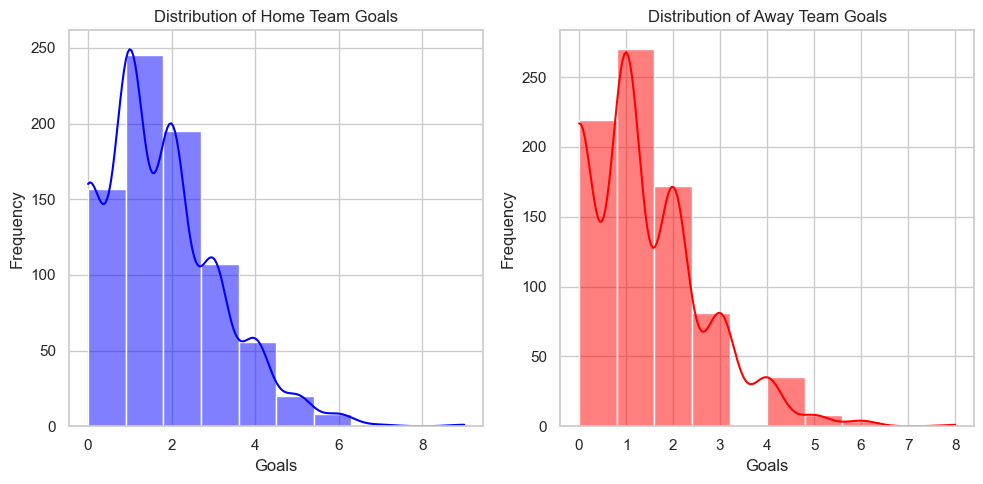

In [34]:
# See how frequently teams score 0, 1, 2, or more goals
# KDE (Kernel Density Estimation) is added to smooth the histogram and visualize the distribution

# Plot histograms for goals scored by home and away teams
plt.figure(figsize=(10,5))

# Home goals
plt.subplot(1, 2, 1)
sns.histplot(data['FTHG'], bins=10, kde=True, color='blue')
plt.title('Distribution of Home Team Goals')
plt.xlabel('Goals')
plt.ylabel('Frequency')

# Away goals
plt.subplot(1, 2, 2)
sns.histplot(data['FTAG'], bins=10, kde=True, color='red')
plt.title('Distribution of Away Team Goals')
plt.xlabel('Goals')
plt.ylabel('Frequency')

# Display the plot
plt.tight_layout()
plt.show()


C:\Users\helen\AppData\Local\Temp\ipykernel_16240\2060856033.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=result_counts.index, y=result_counts.values, palette='Set2')


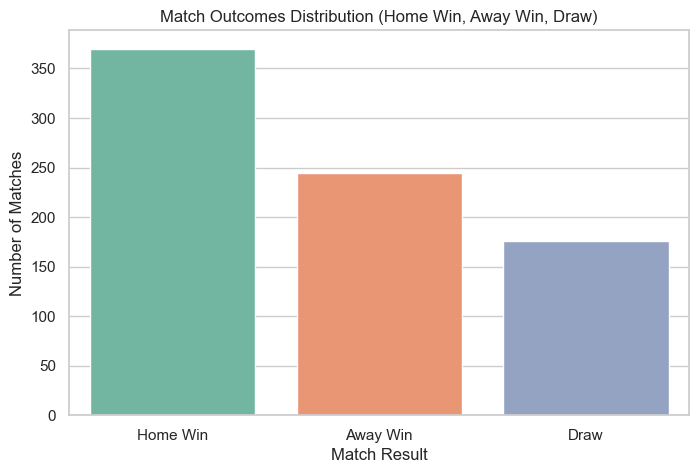

In [35]:
# The barplot shows the distribution of match results. You’ll likely see more home wins, as home advantage is common in football
# Create a new column 'Result' for match outcomes
data['Result'] = data.apply(lambda row: 'Home Win' if row['FTHG'] > row['FTAG'] else ('Away Win' if row['FTAG'] > row['FTHG'] else 'Draw'), axis=1)

# Count the occurrences of each match result
result_counts = data['Result'].value_counts()

# Visualize match outcomes
plt.figure(figsize=(8,5))
sns.barplot(x=result_counts.index, y=result_counts.values, palette='Set2')
plt.title('Match Outcomes Distribution (Home Win, Away Win, Draw)')
plt.xlabel('Match Result')
plt.ylabel('Number of Matches')
plt.show()

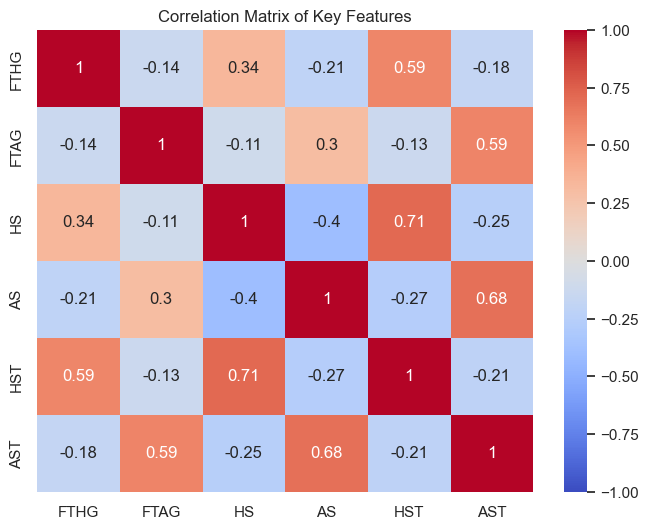

In [36]:
# Correlation measures the relationship between numerical variables 
# This chart shows the correlation between shots on target and goals scored
# Select a few key numerical columns to analyze
numeric_cols = ['FTHG', 'FTAG', 'HS', 'AS', 'HST', 'AST']  # HS: Home Shots, AS: Away Shots, HST: Home Shots on Target, AST: Away Shots on Target

# Compute the correlation matrix
correlation_matrix = data[numeric_cols].corr()

# Plot the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Key Features')
plt.show()


C:\Users\helen\AppData\Local\Temp\ipykernel_16240\3861515693.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_goals = data.resample('M', on='Date').agg({'FTHG': 'mean', 'FTAG': 'mean'})


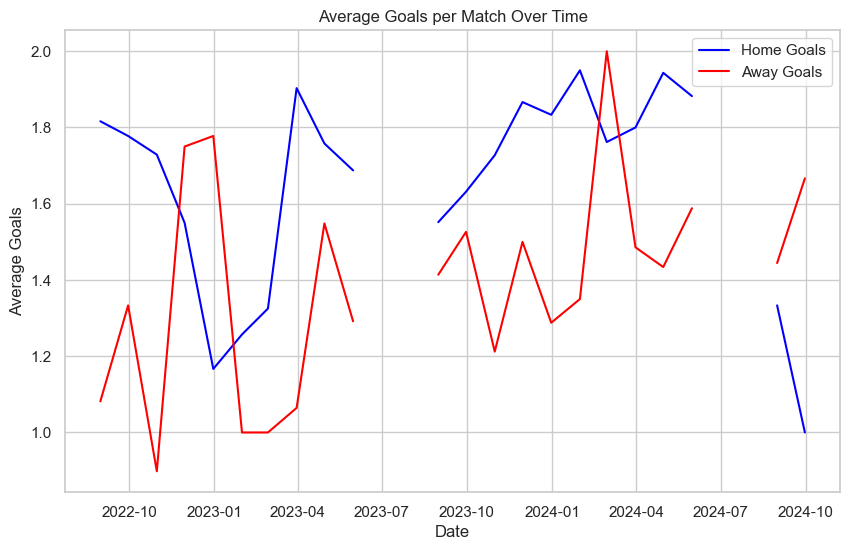

In [37]:
# Group data by season (if you have multiple seasons in your dataset) or by month to track changes over time
# Here, let's assume we have a 'Date' column in datetime format and calculate average goals by month
data['Date'] = pd.to_datetime(data['Date'])  # Ensure the Date column is in datetime format

# Resample the data by month and calculate average goals scored by home and away teams
monthly_avg_goals = data.resample('M', on='Date').agg({'FTHG': 'mean', 'FTAG': 'mean'})

# Plot the trend of average goals over time
plt.figure(figsize=(10,6))
plt.plot(monthly_avg_goals.index, monthly_avg_goals['FTHG'], label='Home Goals', color='blue')
plt.plot(monthly_avg_goals.index, monthly_avg_goals['FTAG'], label='Away Goals', color='red')
plt.title('Average Goals per Match Over Time')
plt.xlabel('Date')
plt.ylabel('Average Goals')
plt.legend()
plt.grid(True)
plt.show()

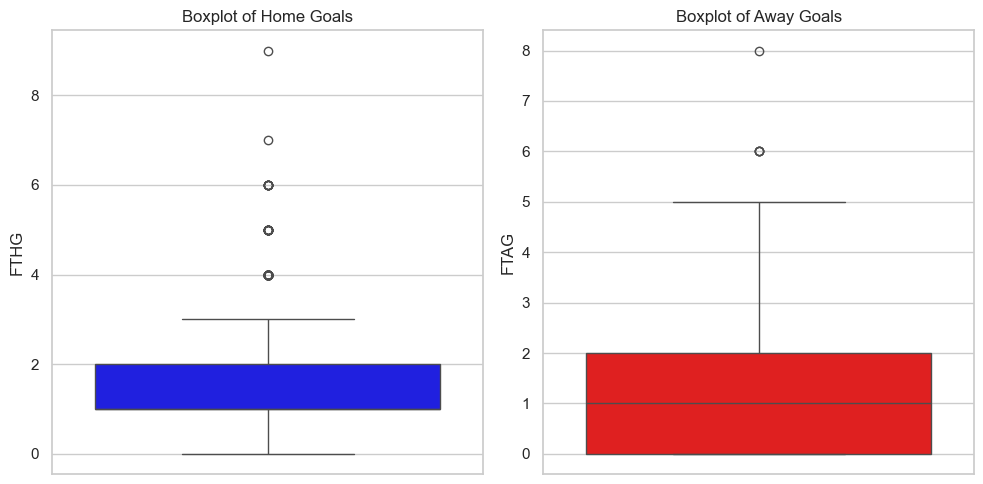

In [38]:
# Boxplot to detect outliers in home and away goals
plt.figure(figsize=(10,5))

# Home goals
plt.subplot(1, 2, 1)
sns.boxplot(y=data['FTHG'], color='blue')
plt.title('Boxplot of Home Goals')

# Away goals
plt.subplot(1, 2, 2)
sns.boxplot(y=data['FTAG'], color='red')
plt.title('Boxplot of Away Goals')

plt.tight_layout()
plt.show()
